<h1><center>Report 12</center></h1>
<h3><center>Jiachen Tian</center><h3>

# Introduction
This week's task is primarily glint detection. Right now there are three potential ways: KCF, Hough Transform, and Ratio Comparison. Even though Ratio Comparison works well under certain conditions within a certain displacement of the glitn as illustrated in the last report, the noise sensitive nature guarantees its failure under uncertain inputs(thousands of different frams with different noise patterns). KCF tracker works a little better comparing to ratio comparison but it tends to fail with too many inputs. In comparion, Hough transform might still work the best with proper parameter settings. All the above algorithm will be illustrated. 

# Setup
Setup path to include our files. import them. use `autoreload` to get changes in as they are made. 

In [2]:
import os
import sys
import cv2
from matplotlib import pyplot as plt
import statistics 
import numpy as np

# load our code
sys.path.insert(0, os.path.abspath('../'))
from plotting import auto_draw
# specific to jupyter notebook
from jupyter_help import cvplt, cvplt_sub
#Import image processing function from optimization
# load any changes as we make them
%load_ext autoreload
%autoreload 2

# Ratio comparison
The previous report illustrates how to map the rectangle back to the original place without taking into account two crucial parameters: ratio differences between each glint caused by noise(present even with noise filtering), and variation in terms of displacements. To diminish errors caused by ratio difference, one could find the stsndard deviation between ratio for each part(Top left, top right, bottom left, bottom right) and get the smallest std. However, using standard deviation would leave the program more vulnerable to errors caused by displacement changes.

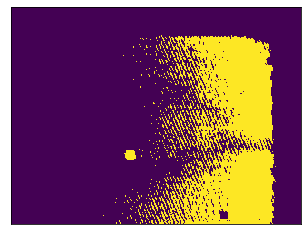

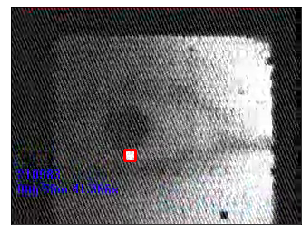

109


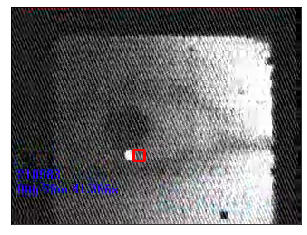

27


In [32]:
#Read in the original image
image = cv2.imread("../input/chosen_pic.png")
keep1 = image.copy()
keep2 = image.copy()
#Run auto threshold on the original image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Don't blur it
blurred = cv2.blur(gray,(1, 1))
_,proc = cv2.threshold(blurred,153,153,cv2.THRESH_BINARY)
#Draw the rendered program
cvplt(proc)
#Set the color
color = (255, 0, 0)
#When calculating standard deviation, the individual ratio is based upon number of non-zero pixels.
sample1 = np.array(proc[158:170, 125:137]) #User chosen coordinates
show1 = cv2.rectangle(keep1, (125, 158), (137, 170), color, 2) 
number1 = np.count_nonzero(sample1)
cvplt(show1)
print(number1)
#Move it right 10 unit(Standard displacement I set on the previous report)
sample2 = np.array(proc[158:170, 135:147])
show2 = cv2.rectangle(keep2, (135, 158), (147, 170), color, 2) 
number2 = np.count_nonzero(sample2)
cvplt(show2)
print(number2)
#Even when it moves to the border, we could still get roughly 27 false pixel that interferes the results.

# Hogh Transform
Previously thought that this method is infeasible on glint due to the small size of glint. However, with the help of OTSU's method and results from the pupil detection, it might just work.

156.0


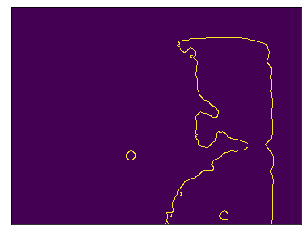

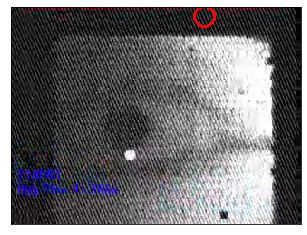

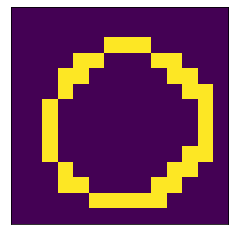

[6.5 7.5 3.8]


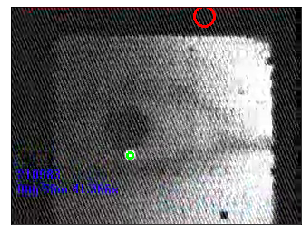

In [64]:
#Read in the original image
image = cv2.imread("../input/chosen_pic.png")
result = image.copy()
#BGR to grey to eliminate extra layers
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#First parameter: blur(set to 10)
blur = (10, 10)
image = cv2.blur(image,blur)
#second parameter: canny(set to 40 to 50)
#Any reasonable parameter would suffice. OTSU would handle the neutralization.
#Third parameter: threshold(determined by OTSU)
#We want the threshold to be exclusively on glint. So first crop the frame
cropped = image[158:170, 125:137]
#Run OTSU
thre,proc = cv2.threshold(cropped,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#Threshold we need
print(thre)
#Affect the threshold on the big image
_, image =cv2.threshold(image,thre,thre,cv2.THRESH_BINARY)
#Canny the image
edges = cv2.Canny(image, 40, 50)
cvplt(edges)
#If we just run the hough transform like this
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1,150,\
                                    param1 = 200, param2 = 20,\
                                    minRadius = 0, maxRadius = 0)
circles = circles[0][0]
#Draw the circle
circle = cv2.circle(result, (circles[0], circles[2]), circles[2], color, 2) 
#Obviously, the algorithm thinks the circle is on the top
cvplt(circle)

#Way out: search in the cropped area cropped out by user in the first place
small_edges = edges[157:171, 125:139]
cvplt(small_edges)
circles = cv2.HoughCircles(small_edges, cv2.HOUGH_GRADIENT, 1,150,\
                                    param1 = 200, param2 = 10,\
                                    minRadius = 0, maxRadius = 0)
color_true = (0, 255, 0)
circles = circles[0][0]
print(circles)
#Map the circle back to the big picture
y = 157 + int(circles[1])
x = 125 + int(circles[0])
#Plot the fixed circle
circle = cv2.circle(result, (x, y), circles[2], color_true, 2) 
cvplt(circle)
#As shown in the green circle, it correctly maps to the correct position.

# Optimization
What if the glint moves beyong the cell?
    - Make the original cell bigger
    - Update the cell position based on pupil

# Analysis
As shown above, for glit detection, I will use hough transform as the main algorithm and KCF as well as ratio differences as complementary analysis to get a more precise result.

# Conclusion
Both Pupil tracking and glint tracking is about to finish. The next step would be to further improve precision and find the angle of staring based upon values from both glint and pupil. 